# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify = y_train)
print(X_train.shape)
print(X_valid.shape)

Using TensorFlow backend.


Untaring file...
(35000, 32, 32, 3)
(15000, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

#maybe use: sklearn.model_selection.train_test_split
#Number of training examples
#take 80
n_train = len(X_train)

#Number of validation examples
n_validation = len(X_valid)

# TODO: What's the shape of an traffic sign image?
image_shape = [32,32,3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 10

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 35000
Number of validation examples = 15000
Image data shape = [32, 32, 3]
Number of classes = 10


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

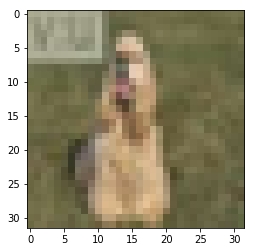

   ClassId              SignName
5        5  Speed limit (80km/h)


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import pandas as pd

# Visualizations will be shown in the notebook.
%matplotlib inline

#chose a random image to plot 
image_index = random.choice(range(n_train))
#plot the image
plt.imshow(X_train[image_index])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

#normalize the data
def normalize_grey_IMGdataset(X):
    total_images = X.shape[0]
    X = X.astype(np.float_)
    X_grey = np.empty([total_images,32,32,1])
    #transform the image into a greyscale
    for i in range(total_images):
        img = X[i]
        img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
        X_grey[i] = np.expand_dims(img, axis=-1)
    X_grey = np.divide((X_grey -128),128)
    return X_grey 

print(X_train.shape)
X_train = normalize_grey_IMGdataset(X_train)
X_valid = normalize_grey_IMGdataset(X_valid)
print(X_train.shape)

(35000, 32, 32, 3)
(35000, 32, 32, 1)


### Model Architecture

The CNN is based on LeNet with some slight modifications:
- convolution layer 1
- activation layer 1
- pooling 1
- convolution layer 2
- activation layer 2
- pooling 2
- flatten with the output of ppoling 1 & pooling 2
- fully connected layer 4
- fully connected layer 5
- fully connected layer 6


In [15]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [9]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    filter1_shape = [5,5,1,6]
    F1 = tf.Variable(tf.random_normal(filter1_shape, mean = mu, stddev = sigma))
    bias1 = tf.Variable(tf.zeros(6))
    strides1 = [1,1,1,1]
    padding1 = 'VALID'
    layer1_out = tf.nn.conv2d(x,F1,strides1,padding1) + bias1
    #print('layer1 shape = ', tf.shape(layer1_out))
    # TODO: Activation.
    activation1_out = tf.nn.relu(layer1_out)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    window_pool = [1, 2, 2, 1]
    stride_pool = [1, 2, 2, 1]
    padding_pool = 'VALID'
    pool1_out = tf.nn.max_pool(activation1_out, window_pool, stride_pool, padding_pool)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filter2_shape = [5,5,6,16]
    F2 = tf.Variable(tf.random_normal(filter2_shape, mean = mu, stddev = sigma))
    bias2 = tf.Variable(tf.zeros(16))
    strides2 = [1,1,1,1]
    padding2 = 'VALID'
    layer2_out = tf.nn.conv2d(pool1_out,F2,strides2,padding2)+ bias2
    #print('layer2 shape = ', tf.shape(layer2_out))
    # TODO: Activation.
    activation2_out = tf.nn.relu(layer2_out)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    window_pool2 = [1, 2, 2, 1]
    stride_pool2 = [1, 2, 2, 1]
    pool2_out = tf.nn.max_pool(activation2_out, window_pool2, stride_pool2, padding_pool)

    # Flatten 2. Input = 5x5x16. Output = 400.
    # Flatten 1. Input = 14x14x6. Output = 1176.
    # Flatten . Input = 400 + 1176. Output = 1576.
    flatten_out_2 = tf.contrib.layers.flatten(pool2_out)
    flatten_out_1 = tf.contrib.layers.flatten(pool1_out)
    
    flatten_out = tf.concat(concat_dim=1,values=[flatten_out_1, flatten_out_2])
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    W3_ = tf.Variable(tf.random_normal(shape=(1576, 1000),mean = mu, stddev = sigma))
    b3_ = tf.Variable(tf.zeros(1000))
    layer3_out_ = tf.add(tf.matmul(flatten_out,W3_), b3_)
    # TODO: Activation.
    activation3_out_ = tf.sigmoid(layer3_out_)
    
    W3 = tf.Variable(tf.random_normal(shape=(1000, 120),mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))
    layer3_out = tf.add(tf.matmul(activation3_out_,W3), b3)
    # TODO: Activation.
    activation3_out = tf.sigmoid(layer3_out)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.random_normal(shape = [120,84],mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84))
    layer4_out = tf.matmul(activation3_out,W4)+ b4
    # TODO: Activation.
    activation4_out = tf.sigmoid(layer4_out)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    W5 = tf.Variable(tf.random_normal(shape = [84,10]))
    b5 = tf.Variable(tf.zeros(10))
    layer4_out = tf.add(tf.matmul(activation4_out,W5), b5)
    logits = layer4_out
    return logits

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
#create the tensor for the the one_hot labels
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

Prepare what is needed to train the model

In [11]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Prepare what will be used to check the accuracy of the model

In [12]:
# argmax returns the index with the largest value across axes of a tensor.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
    
    print("Training...")
    print()
    epoch_list = []
    validation_accuracy_list = []
    for i in range(EPOCHS):
        #make sure to re-shuffle the data each time
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        print('computing validation accuracy')    
        validation_accuracy = evaluate(X_valid, y_valid)
        epoch_list.append(i)
        validation_accuracy_list.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet_augm_grey')
    print("Model saved")

Training...

computing validation accuracy
EPOCH 1 ...
Validation Accuracy = 0.364

computing validation accuracy
EPOCH 2 ...
Validation Accuracy = 0.453

computing validation accuracy
EPOCH 3 ...
Validation Accuracy = 0.497

computing validation accuracy
EPOCH 4 ...
Validation Accuracy = 0.523

computing validation accuracy
EPOCH 5 ...
Validation Accuracy = 0.540

computing validation accuracy
EPOCH 6 ...
Validation Accuracy = 0.558

computing validation accuracy
EPOCH 7 ...
Validation Accuracy = 0.567

computing validation accuracy
EPOCH 8 ...
Validation Accuracy = 0.563

computing validation accuracy
EPOCH 9 ...
Validation Accuracy = 0.588

computing validation accuracy
EPOCH 10 ...
Validation Accuracy = 0.580

Model saved
